<a href="https://colab.research.google.com/github/hrirhea/Face-mask-detection/blob/main/Mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_921.jpg', 'with_mask_324.jpg', 'with_mask_1211.jpg', 'with_mask_572.jpg', 'with_mask_3226.jpg']
['with_mask_2394.jpg', 'with_mask_2592.jpg', 'with_mask_89.jpg', 'with_mask_1106.jpg', 'with_mask_3627.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_399.jpg', 'without_mask_1690.jpg', 'without_mask_418.jpg', 'without_mask_1677.jpg', 'without_mask_443.jpg']
['without_mask_275.jpg', 'without_mask_1868.jpg', 'without_mask_1623.jpg', 'without_mask_572.jpg', 'without_mask_1188.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


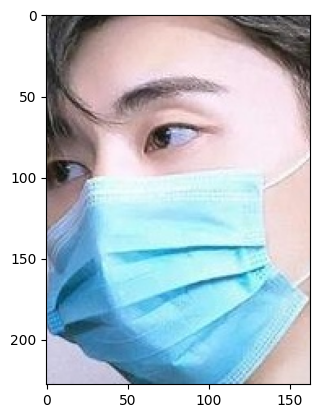

In [14]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

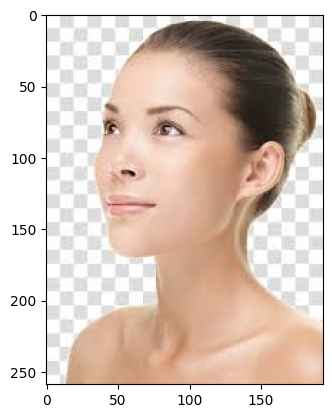

In [15]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 70,  65,  72],
        [ 69,  64,  71],
        [ 67,  62,  69],
        ...,
        [ 69,  67,  78],
        [ 68,  66,  78],
        [ 67,  65,  78]],

       [[ 68,  63,  70],
        [ 67,  62,  69],
        [ 66,  61,  68],
        ...,
        [ 66,  64,  75],
        [ 66,  65,  77],
        [ 66,  64,  77]],

       [[ 68,  63,  70],
        [ 68,  63,  70],
        [ 68,  63,  70],
        ...,
        [ 67,  64,  75],
        [ 67,  64,  76],
        [ 66,  64,  76]],

       ...,

       [[192, 177, 182],
        [200, 185, 190],
        [215, 200, 205],
        ...,
        [255, 246, 245],
        [254, 246, 244],
        [253, 244, 243]],

       [[228, 213, 218],
        [224, 209, 214],
        [221, 206, 211],
        ...,
        [255, 246, 244],
        [253, 245, 244],
        [253, 245, 244]],

       [[237, 222, 227],
        [236, 221, 225],
        [233, 218, 223],
        ...,
        [255, 246, 244],
        [255, 246, 246],
        [255, 246, 247]]], dtype=uint8)
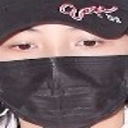

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
X = np.array(data)
Y = np.array(labels)

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [24]:
print(Y)

[1 1 1 ... 0 0 0]


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [226, 227, 219],
        [225, 226, 218],
        [224, 225, 217]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [226, 227, 219],
        [225, 226, 218],
        [224, 225, 217]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [226, 227, 219],
        [226, 227, 219],
        [225, 226, 218]],

       ...,

       [[ 98,  64,  45],
        [124,  79,  54],
        [137,  89,  62],
        ...,
        [227, 212, 169],
        [231, 216, 173],
        [233, 218, 175]],

       [[ 83,  51,  32],
        [127,  86,  60],
        [134,  90,  62],
        ...,
        [226, 211, 168],
        [230, 215, 172],
        [233, 218, 175]],

       [[ 81,  49,  30],
        [116,  77,  51],
        [138,  98,  70],
        ...,
        [226, 211, 168],
        [230, 215, 172],
        [232, 217, 174]]], dtype=uint8)
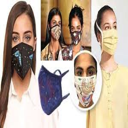

In [28]:
X_train[0]

In [29]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.88627451, 0.89019608, 0.85882353],
        [0.88235294, 0.88627451, 0.85490196],
        [0.87843137, 0.88235294, 0.85098039]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.88627451, 0.89019608, 0.85882353],
        [0.88235294, 0.88627451, 0.85490196],
        [0.87843137, 0.88235294, 0.85098039]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.88627451, 0.89019608, 0.85882353],
        [0.88627451, 0.89019608, 0.85882353],
        [0.88235294, 0.88627451, 0.85490196]],

       ...,

       [[0.38431373, 0.25098039, 0.17647059],
        [0.48627451, 0.30980392, 0.21176471],
        [0.5372549 , 0

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.utils import plot_model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
image_size = (128,128)
channels = 3
image_shape = (image_size[0],image_size[1], channels)

base_model = tf.keras.applications.ResNet152V2(include_top=False,weights="imagenet",input_shape=image_shape)

model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(128, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(64, activation ='relu'),
    Dropout(rate=0.2),

    Dense(2, activation ='sigmoid')
])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)             │ (None, 4, 4, 2048)          │      58,331,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32768)               │         131,072 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,894,402 (255.18 MB)

 Trainable params: 66,684,354 (254.38 MB)

 Non-trainable params: 210,048 (820.50 KB)

In [33]:
# compile the neural network
model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
callbacks = [
    ModelCheckpoint(
        'best_model.weights.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1,
        save_weights_only=True
    )
]

In [35]:
# training the neural network
history = model.fit(
    X_train_scaled,
    Y_train,
    epochs=7,
    validation_data=[X_test_scaled, Y_test],
    callbacks = callbacks
)

Epoch 1/7
189/189 ━━━━━━━━━━━━━━━━━━━━ 288s 738ms/step - acc: 0.8560 - loss: 0.3229 - val_acc: 0.9828 - val_loss: 0.0549
Epoch 2/7


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


189/189 ━━━━━━━━━━━━━━━━━━━━ 107s 285ms/step - acc: 0.9791 - loss: 0.0650 - val_acc: 0.9887 - val_loss: 0.0416
Epoch 3/7
189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 284ms/step - acc: 0.9861 - loss: 0.0477 - val_acc: 0.9874 - val_loss: 0.0342
Epoch 4/7
189/189 ━━━━━━━━━━━━━━━━━━━━ 84s 295ms/step - acc: 0.9937 - loss: 0.0198 - val_acc: 0.9907 - val_loss: 0.0291
Epoch 5/7
189/189 ━━━━━━━━━━━━━━━━━━━━ 80s 284ms/step - acc: 0.9952 - loss: 0.0132 - val_acc: 0.9907 - val_loss: 0.0281
Epoch 6/7
189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 283ms/step - acc: 0.9938 - loss: 0.0196 - val_acc: 0.9861 - val_loss: 0.0597
Epoch 7/7
189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 285ms/step - acc: 0.9924 - loss: 0.0249 - val_acc: 0.9921 - val_loss: 0.0240


In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - acc: 0.9937 - loss: 0.0163
Test Accuracy = 0.9920582175254822


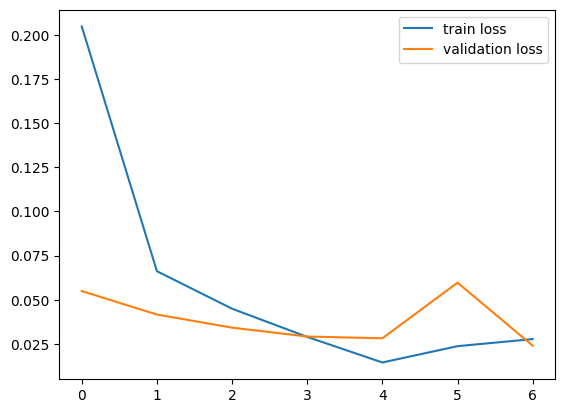

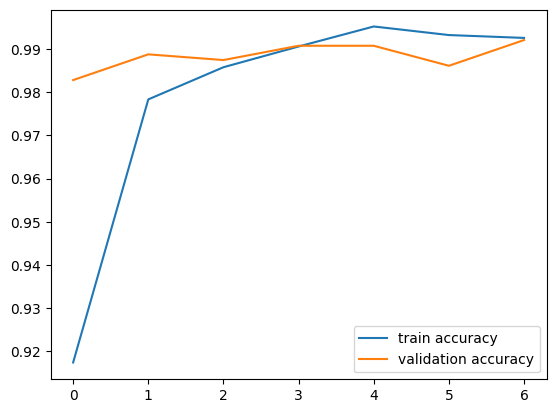

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1545.jpg


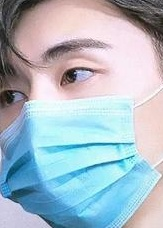

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
[[0.05648109 0.9772849 ]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_2925.jpg


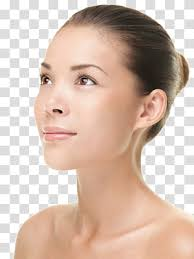

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.8000019 0.0455931]]
0
The person in the image is not wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')